<a href="https://colab.research.google.com/github/chethan180/MindGraph/blob/master/Mindgrap_Fuzzywuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzywuzzy
import numpy as np
import matplotlib.pyplot as mp
import re
import json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Clubs_data.csv to Clubs_data.csv
Saving Metadata.csv to Metadata.csv
Saving Organisers_In_Fests.csv to Organisers_In_Fests.csv
Saving Participants_In_Fests.csv to Participants_In_Fests.csv


In [ ]:
df2 = pd.read_csv('Metadata.csv')
df1 = pd.read_csv('Organisers_In_Fests.csv')
df1

,Fest_Name,Name,Role
0,fest_2,Stcerr Hbmond,organiser_2
1,fest_2,Ayliwn Slks,organiser_6
2,fest_2,Sebestien Hickjman,organiser_7
3,fest_2,Grechen Chlewsn,organiser_8
4,fest_1,Evelin B,organiser_1
5,fest_2,leniez Gilbertson,organiser_10
6,fest_1,mRiver Flipcieno,organiser_2
7,fest_1,Leona Ca,organiser_9
8,fest_2,Ay Kehnei,organiser_1
9,fest_1,tbdulelh Hors,organiser_6


In [ ]:
mat1 = []
mat2 = []
p = []

In [ ]:
list1 = df1['Name'].tolist()
list2 = df2['Name'].tolist()
  
# taking the threshold as 80
threshold = 65
  
# iterating through list1 to extract 
# it's closest match from list2
for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.token_sort_ratio))
df1['matches'] = mat1
  
# iterating through the closest matches
# to filter out the maximum closest match
for j in df1['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []
  
  
# storing the resultant matches back to dframe1
df1['matches'] = mat2
# print("\nDataFrame after Fuzzy matching using fuzz.partial_ratio:")
df1

,Fest_Name,Name,Role,matches
0,fest_2,Stcerr Hbmond,organiser_2,Starr Hammond
1,fest_2,Ayliwn Slks,organiser_6,Aylin Seals
2,fest_2,Sebestien Hickjman,organiser_7,Sebastien Hickman
3,fest_2,Grechen Chlewsn,organiser_8,Gretchen Clawson
4,fest_1,Evelin B,organiser_1,Evelin Bradley
5,fest_2,leniez Gilbertson,organiser_10,
6,fest_1,mRiver Flipcieno,organiser_2,River Feliciano
7,fest_1,Leona Ca,organiser_9,Leona Cabral
8,fest_2,Ay Kehnei,organiser_1,Aya Kennedy
9,fest_1,tbdulelh Hors,organiser_6,


In [ ]:
df3 = pd.read_csv('Clubs_data.csv')
df4 = pd.read_csv('Participants_In_Fests.csv')

In [ ]:
list1 = df3['Name'].tolist()
list2 = df2['Name'].tolist()
  
# taking the threshold as 80
threshold = 65
  
# iterating through list1 to extract 
# it's closest match from list2
for i in list1:
    mat1.append(process.extractOne(
      i, list2, scorer=fuzz.partial_ratio))
df3['matches'] = mat1
  
# iterating through the closest matches
# to filter out the maximum closest match
for j in df3['matches']:
    if j[1] >= threshold:
        p.append(j[0])
    mat2.append(",".join(p))
    p = []
  
  
# storing the resultant matches back to dframe1
df3['matches'] = mat2
# print("\nDataFrame after Fuzzy matching using fuzz.partial_ratio:")
df3

,Club_Name,Name,Event,Role,matches
0,club_3,Darien Ma,club_3_event_2,Participant,Darien Martens
1,club_2,Sege Schrock,club_2_event_1,Participant,Sage Schrock
2,club_3,Alison bci,club_3_event_2,Participant,Alison Mcvey
3,club_1,kiara jauregui,club_1_event_1,Participant,Kiara Jauregui
4,club_2,Tete Buim,club_2_event_3,Participant,Tate Blum
...,...,...,...,...,...
1041,club_3,Kalen L,club_3_event_2,organiser_3,Kalen Logan
1042,club_3,Kthrine Leeone,club_3_event_3,organiser_1,Kathrine Leone
1043,club_1,IbrehimuSku,club_1_event_2,Participant,
1044,club_1,Mildlo Ganfield,club_1_event_2,Participant,Milo Greenfield


In [ ]:
df1['matches'].replace('', np.nan, inplace=True)
df1_1 = df1.dropna()
df1_1 = df1_1.drop(columns=['Name'])
df1_1=df1_1.rename(columns={'matches':'Name'})
df1_1.to_csv('F_Dedup_org.csv')
df1_1

,Fest_Name,Role,Name
0,fest_2,organiser_2,Starr Hammond
1,fest_2,organiser_6,Aylin Seals
2,fest_2,organiser_7,Sebastien Hickman
3,fest_2,organiser_8,Gretchen Clawson
4,fest_1,organiser_1,Evelin Bradley
6,fest_1,organiser_2,River Feliciano
7,fest_1,organiser_9,Leona Cabral
8,fest_2,organiser_1,Aya Kennedy
10,fest_2,organiser_3,Stephon Smoot
11,fest_1,organiser_10,Perry Perryman


In [ ]:
df_link_org = pd.merge(df1_1,df2, on='Name', how='inner')

df_link_org.to_csv('F_org_linked.csv')

df_link_org

,Fest_Name,Role,Name,ID
0,fest_2,organiser_2,Starr Hammond,18XJ1A0134
1,fest_2,organiser_6,Aylin Seals,17XJ1A0149
2,fest_2,organiser_7,Sebastien Hickman,17XJ1A0155
3,fest_2,organiser_8,Gretchen Clawson,17XJ1A0195
4,fest_1,organiser_1,Evelin Bradley,18XJ1A0188
5,fest_1,organiser_2,River Feliciano,18XJ1A0324
6,fest_1,organiser_9,Leona Cabral,17XJ1A0256
7,fest_2,organiser_1,Aya Kennedy,18XJ1A0107
8,fest_2,organiser_3,Stephon Smoot,17XJ1A0115
9,fest_1,organiser_10,Perry Perryman,17XJ1A0317


In [ ]:
df_club = pd.read_csv('F_club_linked.csv')

df_ID = df_club.iloc[:,5]

ID = df_ID.to_list()
# print(ID[0])

ID_int = []

# str1 = re.sub("XJ1A0","",ID[0])

# print(int(str1))

for id in ID:
  str1 = re.sub("XJ1A0","",id)
  ID_int.append(int(str1))

df_club['ID_int']= ID_int

df_club.to_csv('Linked_club_int.csv')

df_club = df_club.sort_values('Event')

df_club

,Unnamed: 0,Club_Name,Event,Role,Name,ID,ID_int
120,120,club_1,club_1_event_1,Participant,Chelsey Dean,17XJ1A0205,17205
612,612,club_1,club_1_event_1,Participant,Gisselle Thornton,18XJ1A0346,18346
611,611,club_1,club_1_event_1,Participant,Frank Halstead,17XJ1A0332,17332
602,602,club_1,club_1_event_1,Participant,Jaylan Krieger,18XJ1A0161,18161
601,601,club_1,club_1_event_1,Participant,Jaylan Krieger,18XJ1A0161,18161
...,...,...,...,...,...,...,...
125,125,club_3,club_3_event_3,Participant,Chelsey Dean,17XJ1A0205,17205
529,529,club_3,club_3_event_3,organiser_5,Sydnee Mears,17XJ1A0314,17314
417,417,club_3,club_3_event_3,Participant,Keri Carrier,17XJ1A0101,17101
241,241,club_3,club_3_event_3,Participant,Karla Parris,17XJ1A0173,17173


<function matplotlib.pyplot.show(*args, **kw)>

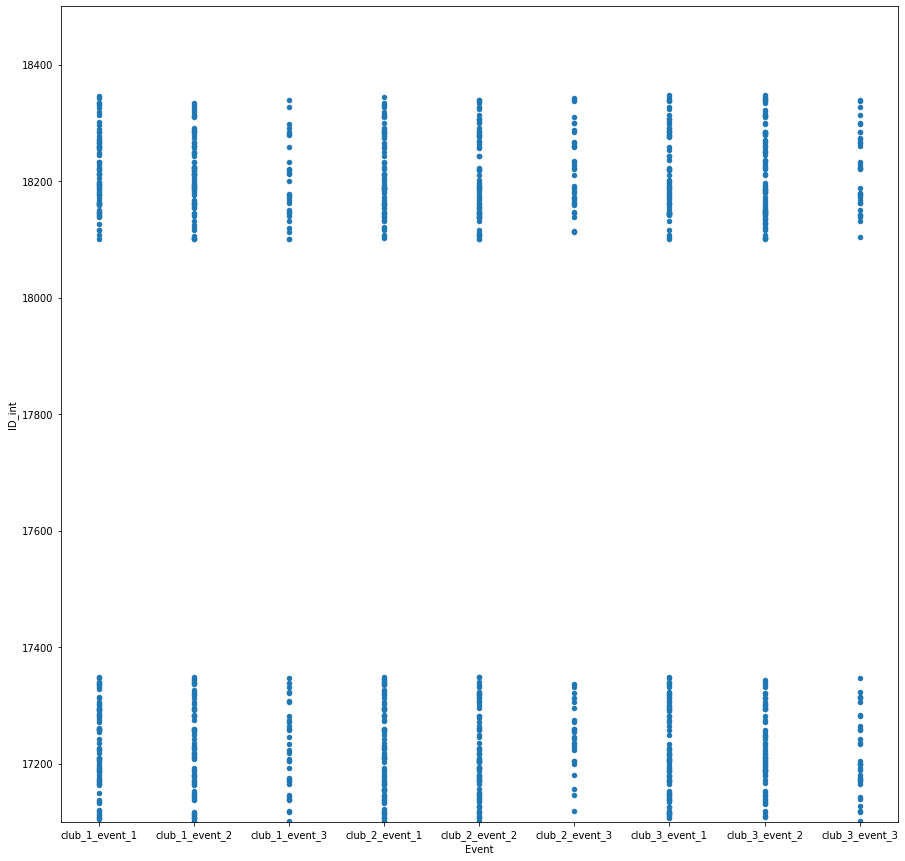

In [ ]:
df_club.plot(x="Event", y="ID_int", kind="scatter",figsize=(15,15),ylim=(17100,18500))

mp.show

In [ ]:
df_club_freq = df_club['Club_Name'].value_counts()

df_club_freq.head()

club_3    339
club_2    334
club_1    330
Name: Club_Name, dtype: int64

In [ ]:
df_Event_freq = df_club['Event'].value_counts()

df_Event_freq.sort_values

<bound method Series.sort_values of club_2_event_2    138
club_3_event_2    138
club_2_event_1    137
club_3_event_1    136
club_1_event_2    135
club_1_event_1    134
club_3_event_3     65
club_1_event_3     61
club_2_event_3     59
Name: Event, dtype: int64>

In [ ]:
df_fest = pd.read_csv('F_fest_linked.csv')

df_ID = df_fest.iloc[:,4]

ID = df_ID.to_list()
# print(ID[0])

ID_int = []

# str1 = re.sub("XJ1A0","",ID[0])

# print(int(str1))

for id in ID:
  str1 = re.sub("XJ1A0","",id)
  ID_int.append(int(str1))

df_fest['ID_int']= ID_int

df_fest.to_csv('Linked_fest_int.csv')

df_fest= df_fest.sort_values('Event')

df_fest

,Unnamed: 0,Fest_Name,Event,Name,ID,ID_int
3823,3823,fest_1,fest_1_event_1,Crystal Leavitt,17XJ1A0163,17163
3245,3245,fest_1,fest_1_event_1,Abagail Marx,18XJ1A0202,18202
2600,2600,fest_1,fest_1_event_1,Thea Noyes,17XJ1A0172,17172
388,388,fest_1,fest_1_event_1,Gerald Arreola,17XJ1A0252,17252
3232,3232,fest_1,fest_1_event_1,Chester Chavez,18XJ1A0129,18129
...,...,...,...,...,...,...
1848,1848,fest_2,fest_2_event_9,Gwendolyn Bain,17XJ1A0270,17270
3839,3839,fest_2,fest_2_event_9,Rachelle Lamb,17XJ1A0177,17177
3450,3450,fest_2,fest_2_event_9,Stone Rayburn,18XJ1A0182,18182
2231,2231,fest_2,fest_2_event_9,Nataly Graham,17XJ1A0198,17198


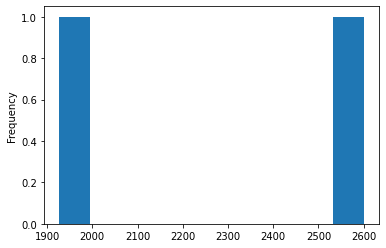

In [ ]:
df_fest_freq = df_fest['Fest_Name'].value_counts()

df_fest_freq

fest_freq = df_fest_freq.plot(kind='hist')
fest_freq

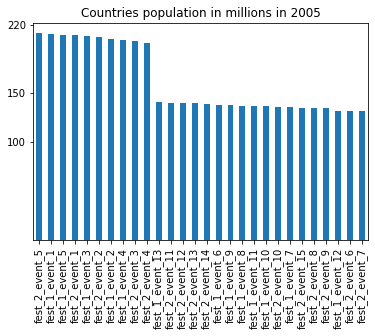

In [ ]:
df_fEvent_freq = df_fest['Event'].value_counts()

df_fEvent_freq

p1 = df_fEvent_freq.plot(kind='bar', yticks=[100,150,220])
p1

<function matplotlib.pyplot.show(*args, **kw)>

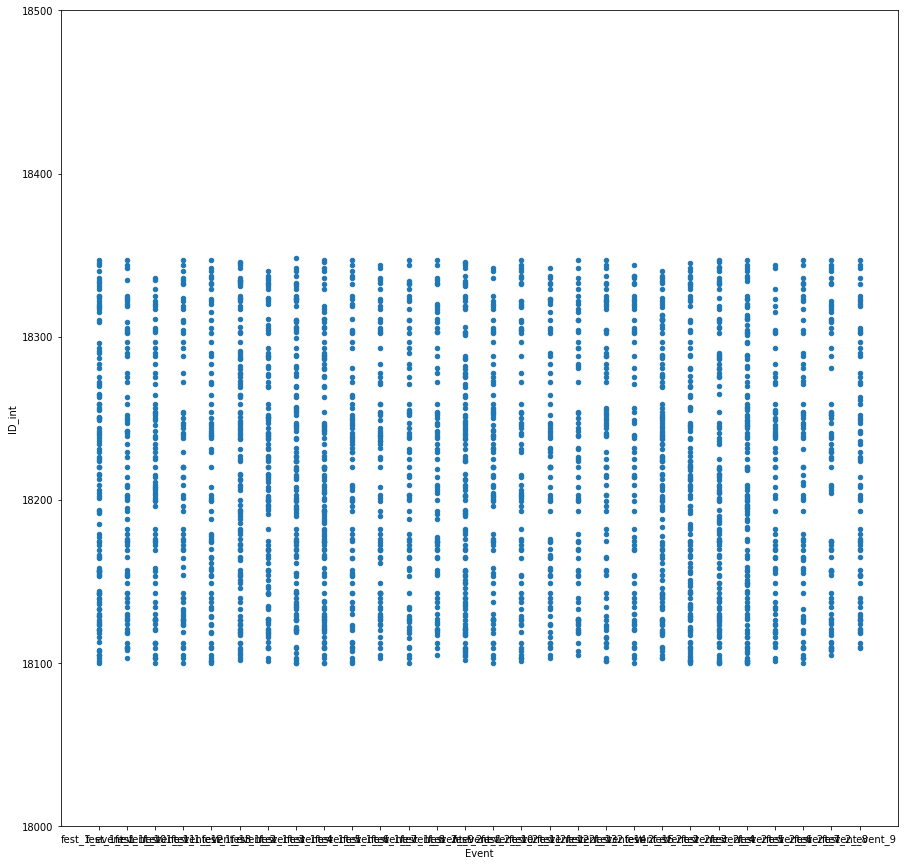

In [ ]:
df_fest.plot(x="Event", y="ID_int", kind="scatter",figsize=(15,15),ylim=(18000,18500))

mp.show

In [ ]:
# out = df_club.to_json('temp.json', orient='records', lines=True)

# print(out)

df_club

,Unnamed: 0,Club_Name,Event,Role,Name,ID,ID_int
120,120,club_1,club_1_event_1,Participant,Chelsey Dean,17XJ1A0205,17205
612,612,club_1,club_1_event_1,Participant,Gisselle Thornton,18XJ1A0346,18346
611,611,club_1,club_1_event_1,Participant,Frank Halstead,17XJ1A0332,17332
602,602,club_1,club_1_event_1,Participant,Jaylan Krieger,18XJ1A0161,18161
601,601,club_1,club_1_event_1,Participant,Jaylan Krieger,18XJ1A0161,18161
...,...,...,...,...,...,...,...
125,125,club_3,club_3_event_3,Participant,Chelsey Dean,17XJ1A0205,17205
529,529,club_3,club_3_event_3,organiser_5,Sydnee Mears,17XJ1A0314,17314
417,417,club_3,club_3_event_3,Participant,Keri Carrier,17XJ1A0101,17101
241,241,club_3,club_3_event_3,Participant,Karla Parris,17XJ1A0173,17173


In [ ]:
df_test = pd.read_csv('Linked_club_int.csv')

df_test_fest = pd.read_csv('Linked_fest_int.csv')

df_test

,Unnamed: 0,Unnamed: 0.1,Club_Name,Event,Role,Name,ID,ID_int
0,0,0,club_3,club_3_event_2,Participant,Darien Martens,17XJ1A0220,17220
1,1,1,club_2,club_2_event_1,Participant,Sage Schrock,17XJ1A0165,17165
2,2,2,club_3,club_3_event_1,Participant,Sage Schrock,17XJ1A0165,17165
3,3,3,club_1,club_1_event_1,Participant,Sage Schrock,17XJ1A0165,17165
4,4,4,club_3,club_3_event_3,Participant,Sage Schrock,17XJ1A0165,17165
...,...,...,...,...,...,...,...,...
998,998,998,club_2,club_2_event_1,Participant,Alycia Woodard,17XJ1A0107,17107
999,999,999,club_2,club_2_event_2,Participant,Ben Alston,18XJ1A0267,18267
1000,1000,1000,club_2,club_2_event_1,Participant,Dorothy Mayhew,18XJ1A0104,18104
1001,1001,1001,club_2,club_2_event_1,Participant,Josef Finney,17XJ1A0274,17274


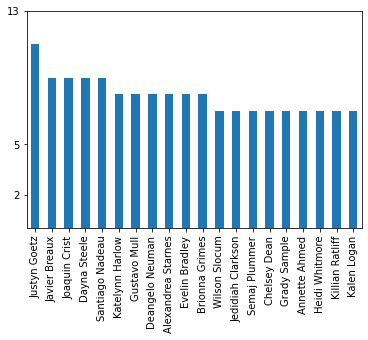

In [ ]:
df_student_freq = df_test['Name'].value_counts()

df_student_freq = df_student_freq[:20]

p1 = df_student_freq.plot(kind='bar', yticks=[2,5,13])

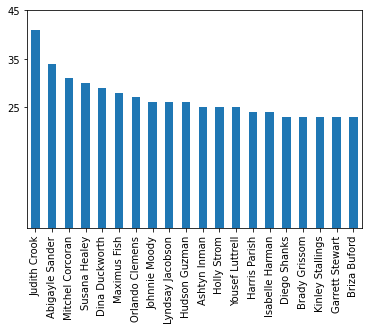

In [ ]:
df_student_fest_freq = df_test_fest['Name'].value_counts()

df_student_fest_freq = df_student_fest_freq[:20]

p2 = df_student_fest_freq.plot(kind='bar', yticks=[25,35,45])